#01-data-exploration
In this notebook, we will explore the Higgs boson dataset to gain a better understanding of the data and its properties. We will perform some initial data analysis, such as checking for missing values, identifying the distribution of each feature, and visualizing the relationships between different features. This will help us determine any preprocessing steps that may be required before building and training our models.

#Importing Libraries
In this section, we will import the necessary libraries and packages that will be used throughout the notebook.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Loading Data
Here, we will load the Higgs boson dataset into a pandas DataFrame and inspect the data to get a better understanding of the data structure and format.

In [2]:
# Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

# Load data from Google Drive
data_path = '/content/drive/MyDrive/Higgs_dataset/HIGGS_train.csv'
df = pd.read_csv(data_path, header=None,low_memory=False)
print(df.head())

Mounted at /content/drive
    0      1      2      3      4      5      6      7          8     9   ...  \
0  1.0  0.869 -0.635  0.226  0.327 -0.690  0.754 -0.249  -1.09E+00  0.00  ...   
1  1.0  0.908  0.329  0.359  1.500 -0.313  1.100 -0.558  -1.59E+00  2.17  ...   
2  1.0  0.799  1.470 -1.640  0.454  0.426  1.100  1.280   1.38E+00  0.00  ...   
3  0.0  1.340 -0.877  0.936  1.990  0.882  1.790 -1.650  -9.42E-01  0.00  ...   
4  1.0  1.110  0.321  1.520  0.883 -1.210  0.681 -1.070  -9.22E-01  0.00  ...   

       19        20        21     22     23     24     25     26     27     28  
0 -0.0105 -0.045800  3.10E+00  1.350  0.980  0.978  0.920  0.722  0.989  0.877  
1 -1.1400 -0.000819  0.00E+00  0.302  0.833  0.986  0.978  0.780  0.992  0.798  
2  1.1300  0.900000  0.00E+00  0.910  1.110  0.986  0.951  0.803  0.866  0.780  
3 -0.6780 -1.360000  0.00E+00  0.947  1.030  0.999  0.728  0.869  1.030  0.958  
4 -0.3740  0.113000  0.00E+00  0.756  1.360  0.987  0.838  1.130  0.872  0.808  



#Exploratory Data Analysis
In this section, we will perform exploratory data analysis by visualizing and analyzing the data to identify any patterns, trends, or relationships between different features. We will also identify any potential issues or anomalies in the data.

Number of rows and columns:  (600000, 29)
         class_label         lep_pt        lep_eta        lep_phi  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean        0.529287       0.992486      -0.000112       0.000166   
std         0.499142       0.565045       1.007858       1.005480   
min         0.000000       0.275000      -2.430000      -1.740000   
25%         0.000000       0.591000      -0.737000      -0.870000   
50%         1.000000       0.854000      -0.001030       0.002640   
75%         1.000000       1.240000       0.738000       0.870000   
max         1.000000       8.710000       2.430000       1.740000   

       miss_energy_mag  miss_energy_phi        jet1_pt       jet1_eta  \
count    600000.000000    600000.000000  600000.000000  600000.000000   
mean          0.998019        -0.001156       0.990147      -0.002193   
std           0.599282         1.006754       0.474625       1.010296   
min           0.000626        -1.740000     

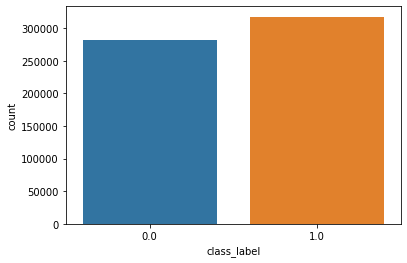

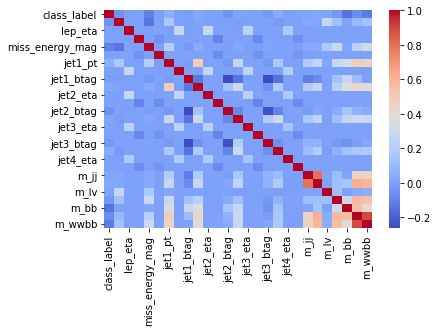

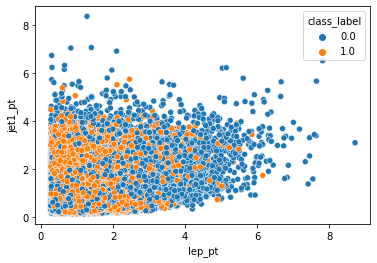

1.0    317572
0.0    282428
Name: class_label, dtype: int64


In [7]:
# Assign column names
cols = ["class_label", "lep_pt", "lep_eta", "lep_phi", "miss_energy_mag", "miss_energy_phi", 
        "jet1_pt", "jet1_eta", "jet1_phi", "jet1_btag", "jet2_pt", "jet2_eta", "jet2_phi", 
        "jet2_btag", "jet3_pt", "jet3_eta", "jet3_phi", "jet3_btag", "jet4_pt", "jet4_eta", 
        "jet4_phi", "jet4_btag", "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]
df.columns = cols



# Print the number of rows and columns in the dataset
print("Number of rows and columns: ", df.shape)

# Print the summary statistics of the dataset
print(df.describe())

# Plot a count plot of the class label
sns.countplot(data=df, x="class_label")
plt.show()

# Plot a correlation matrix of the features
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.show()


#Preprocessing
In this section, we will preprocess the data by performing necessary data cleaning, normalization, and feature engineering. We will also split the dataset into training and validation sets for model training and evaluation.

In [19]:
# Check for missing or invalid values
print(df.isna().sum())

# Replace missing value with mean of the column
mean_jet3_btag = df['jet3_btag'].mean()
df['jet3_btag'].fillna(mean_jet3_btag, inplace=True)

# Split the data into 70% training, 15% validation, and 15% testing
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Save the data to CSV files
train_data.to_csv('train.csv', index=False)
val_data.to_csv('validation.csv', index=False)
test_data.to_csv('test.csv', index=False)



class_label        0
lep_pt             0
lep_eta            0
lep_phi            0
miss_energy_mag    0
miss_energy_phi    0
jet1_pt            0
jet1_eta           0
jet1_phi           0
jet1_btag          0
jet2_pt            0
jet2_eta           0
jet2_phi           0
jet2_btag          0
jet3_pt            0
jet3_eta           0
jet3_phi           0
jet3_btag          0
jet4_pt            0
jet4_eta           0
jet4_phi           0
jet4_btag          0
m_jj               0
m_jjj              0
m_lv               0
m_jlv              0
m_bb               0
m_wbb              0
m_wwbb             0
dtype: int64
class_label        0
lep_pt             0
lep_eta            0
lep_phi            0
miss_energy_mag    0
miss_energy_phi    0
jet1_pt            0
jet1_eta           0
jet1_phi           0
jet1_btag          0
jet2_pt            0
jet2_eta           0
jet2_phi           0
jet2_btag          0
jet3_pt            0
jet3_eta           0
jet3_phi           0
jet3_btag          0
